# Import Necessary Packages #

In [6]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import double_pendulum as dp

# Initialize Test Data #
Using a small L2 value and m2=0 for later plotting test

In [2]:
# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 0.0001
m1, m2 = 1, 0

# Initial conditions for y
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0]) # theta_1, z1, theta_2, z2

# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 30, 0.01
t = np.arange(0, tmax+dt, dt)

# Do the numerical integration of the Double Pendulum equation
y = odeint(dp.double_pen, y0, t, args=(L1, L2, m1, m2))

# Unpack theta as a function of time
theta1 = y[:,0]
theta2 = y[:,2]

# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)

x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Test 1 #
Basic tests of double pendulum function's returned values

Expected result: Arrays will have equal values when compared to their (defined) initial conditions

Shows: Function correctly reads in an array and returns expected values

In [3]:
# Calculate X1 using L1*sin(theta1) where theta1 = y0[0]
X1 = L1*np.sin(y0[0])
assert X1 == x1[0]

# Calculate Y1 using -L1*cos(theta1) where theta1 = y0[0]
Y1 = -L1*np.cos(y0[0])
assert Y1 == y1[0]

# Calculate X2 using X1+L2*sin(theta2) where theta2 = y0[2]
X2 = X1 + L2 * np.sin(y0[2])
assert X2 == x2[0]

# Calculate Y2 using Y1-L2*cos(theta2) where theta2 = y0[2]
Y2 = Y1 - L2 * np.cos(y0[2])
assert Y2 == y2[0]

# Test 2 #
Test double pendulum function using a small value for L2 and 0 for m2

Expected result: plot will have a path similar/identical to a single pendulum

Shows: double pendulum function imported correctly and gives expected results

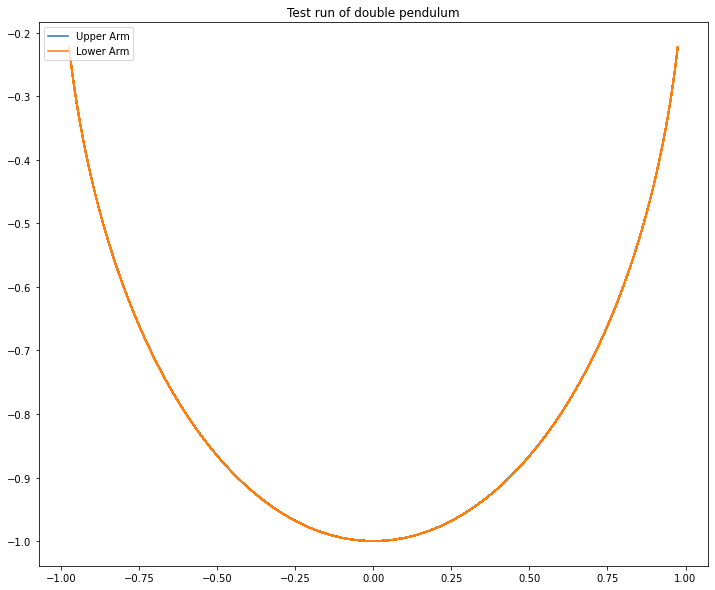

In [7]:
# Plot
fig = plt.figure(figsize=(12,10))

plt.plot(x1, y1, label="Upper Arm") # Plot arm 1 of pendulum
plt.plot(x2, y2, label="Lower Arm") # Pot arm 2 of pendulum

plt.title("Test run of double pendulum")
plt.legend(loc="upper left")

plt.show()